# Esercitazione 7: simulazione di dinamica molecolare Monte Carlo nell'insieme canonico

Uso il codice Monte Carlo NVT fornito per stampare i valori istantanei dell'energia potenziale per particella, $U/N$, e della pressione, $P$, lungo le simulazioni Monte Carlo **equilibrate** (di $M=10^5$ passi MC e dove il rapporto di accettazione di Metropolis è stato fissato approssimativamente al 50%) nelle seguenti condizioni termodinamiche:
- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cutoff: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cutoff: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cutoff: $r_c = 5.0$)

Nota: la sottocartella "config" contiene i file che il programma prende effettivamente come input, cioè le condizioni iniziali di temperatura, densità, ecc. e una configurazione di posizioni iniziali.

La sottocartella "input" contiene una collezione di condizioni iniziali relative a gas, solido e liquido, e altrettante configurazioni iniziali, calcolate equilibrando ciascuna fase, e infine una configurazione iniziale di solido fcc, dalla quale si può partire per l'equilibrazione.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

phase = ["solid", "liquid","gas"]

def plotConfig(fileName,elevation,azimuth):
    fig = plt.figure(figsize=(10,8))
    X, Y, Z = np.loadtxt(fileName,usecols=(0,1,2),unpack=True)
    ax = fig.add_subplot(121, projection='3d',proj_type='ortho')
    ax.scatter(X, Y, Z, c='blue', marker='.',s=100)
    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    bound=0.5
    ax.set_xlim(-bound,bound)
    ax.set_ylim(-bound,bound)
    ax.set_zlim(-bound,bound)
    #plot()
    plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [28]:
# stampa le condizioni iniziali
# in modo leggibile
def printInput(fileDiInput):
    lines = fileDiInput.split('\n')[:7]
    custom_strings = ['Temperatura: ', 'Numero Particelle: ',
                      'Densità: ', 'Distanza di Cutoff: ',
                      'Delta: ', 'Numero N di blocchi: ', 
                      'Numero L di step per blocco: ']
    modified_lines = [custom_strings[i] +\
                      line.strip() for i, line in enumerate(lines)]
    for line in modified_lines:
        print(line)

# imposta le condizioni iniziali relative 
# alla fase (solido, liquido, gas)
# e la configurazione iniziale, che può essere di fcc
# o piuttosto di fase equilibrata.

def setInitialConfig(fase,initialConfig,\
                     step,Nblocchi,LStepBlocco,cartellaMadre):
    with open("input/input."+fase, "r") as file:
        input_content = file.read()
    customInput1=input_content.\
        replace('10\n1000', \
                str(Nblocchi)+'\n'+str(LStepBlocco)+'\n'+cartellaMadre)
    #print(step)
    customInput=customInput1.\
        replace('0.21', str(step))
    with open("config/input.dat", "w") as file:
        file.write(customInput)
    Xfcc,Yfxx,Zfxx= np.loadtxt(initialConfig,usecols=(0,1,2),unpack=True)
    data = np.column_stack((Xfcc,Yfxx,Zfxx))
    np.savetxt('config/config.0', data, fmt='%.6e', delimiter='\t')
    fccTrue='fcc'
    if(not initialConfig=='input/config.fcc'):
        fccTrue='equilibrio'
    print("HO IMPOSTATO LA CONFIGURAZIONE INIZIALE"+'\n'+
          fase+' '+fccTrue+' con')
    printInput(customInput)
    plotConfig('config/config.0',0,0)

In [6]:
import subprocess
import os
import shutil


def runSimulation(fase, cartella_origine):

    subprocess.run('./esercitazione.exe')

    sottocartella_destinazione = cartella_origine+fase

    for file in os.listdir(cartella_origine):
        origine_file = os.path.join(cartella_origine, file)
        destinazione_file = os.path.join(sottocartella_destinazione, file)
        if os.path.isfile(origine_file):
            shutil.move(origine_file, destinazione_file)
    print('HO OTTENUTO LA CONFIGURAZIONE FINALE\n'+
          fase)
    plotConfig(cartella_origine+fase+'/config.final',0,0)
    
def plotData(cartella_origine, maxRows):

    for i in range (0,3) :
        x, epot, epot_prog, epoterr_prog = np.loadtxt(cartella_origine+phase[i]+"/output.epot.0",max_rows=maxRows, unpack=True)
        y, pres, pres_prog, preserr_prog = np.loadtxt(cartella_origine+phase[i]+"/output.pres.0",max_rows=maxRows,unpack=True)
        plt.figure(figsize=(15,7))
        plt.plot(x,pres, color='orange', label="Pressione")
        plt.plot(y,epot, color='red', label="U/N")
        plt.title(phase[i],fontsize=25)
        plt.xlabel('Passi',fontsize=15)
        plt.ylabel('Grandezze termodinamiche',fontsize=15)
        plt.legend(fontsize=20)
        plt.grid(True)
        plt.show()

# 1. Equilibrazione

### Parto dalla configurazione di solido fcc ed equilibro le tre fasi.

In [3]:
#Equilibrazione:
import numpy as np
import matplotlib.pyplot as plt

passo=[0.11,0.2,6.]


In [4]:

print('do you want to execute this program:')
answer = input('->  [yes| No]: ' )
if answer == 'yes' :
    for i in range (0,3) :
        setInitialConfig(phase[i],'input/config.fcc',passo[i],500,20,'equilibrazione/')
        runSimulation(phase[i],'equilibrazione/')

do you want to execute this program:


->  [yes| No]:  no


Si trova

| fase         | Solido   | Liquido  | Gas   |
|--------------|----------|----------|-------|
| $\delta$     | 0.11     | 0.2      | 6     |
| accettazione | 0.5      | 0.5      | 0.61  |

L'accettazione del gas non si riesce a ridurre sotto questo valore.

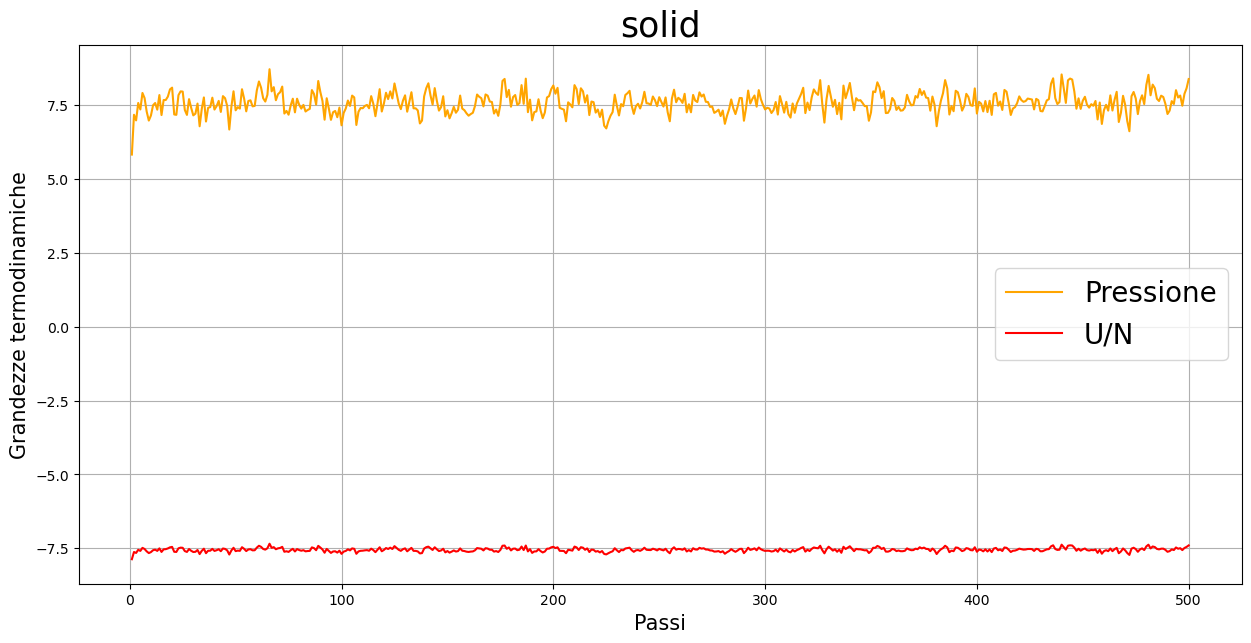

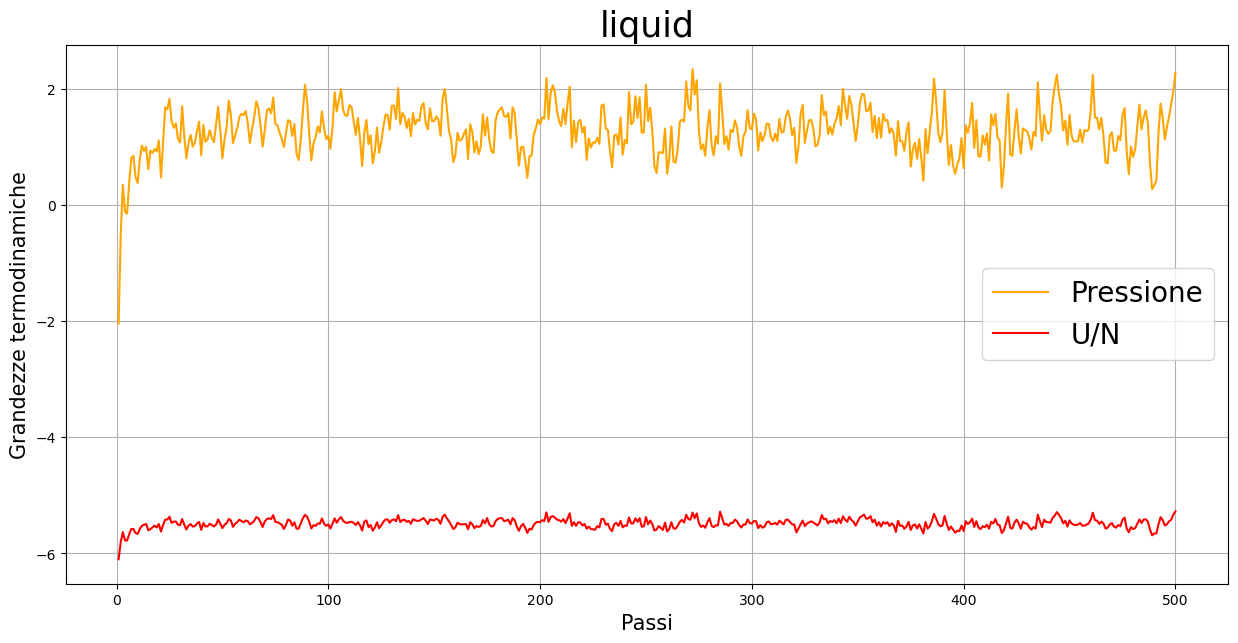

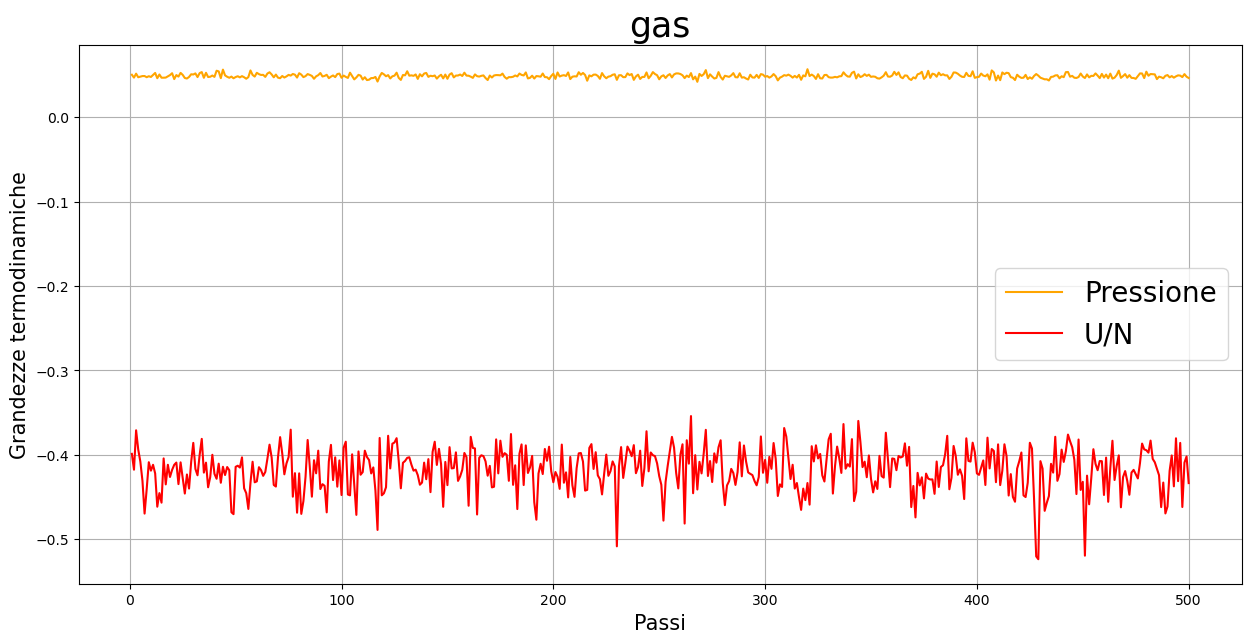

In [7]:
plotData('equilibrazione/',500)

### Osservo che dopo 10000 passi, le fasi si possono considerare equilibrate. Osservo che l'energia potenziale del gas presenta forti fluttuazioni che non si riducono mai nel tempo, e bisogna tenerne conto. Qualcosa di simile si osserva anche per la pressione del fluido.

# 2. Misura delle correlazioni

Una volta che questi dati sono stati prodotti, calcola e crea delle immagini con uno script Python delle funzioni di autocorrelazione di $U/N$ e $P$ per ottenere il tempo di correlazione del Monte Carlo tramite un fit con una funzione esponenziale. Ciò ti suggerirà quanto grandi dovrebbero essere i blocchi nelle tue simulazioni.

$$ \chi (t) = \frac { 
\langle x(t')x(t'+t) \rangle _{t'} 
-\langle x \rangle ^2  
} {\sigma_x ^2}
$$

Lancio ora le simulazioni a partire da configurazioni di equilibrio ottenute nella fase di equilibrazione.

In [9]:

print('do you want to execute this program:')
answer = input('->  [yes| No]: ' )
if answer == 'yes' :
    for i in range (0,3) :
        setInitialConfig(phase[i],'equilibrazione/'+phase[i]+'/config.final',passo[i],50000,1,'correlazione/')
        runSimulation(phase[i],'correlazione/')


do you want to execute this program:


->  [yes| No]:  n


### Disegno i primi mille passi della simulazione (in totale ho fatto 50000 passi):

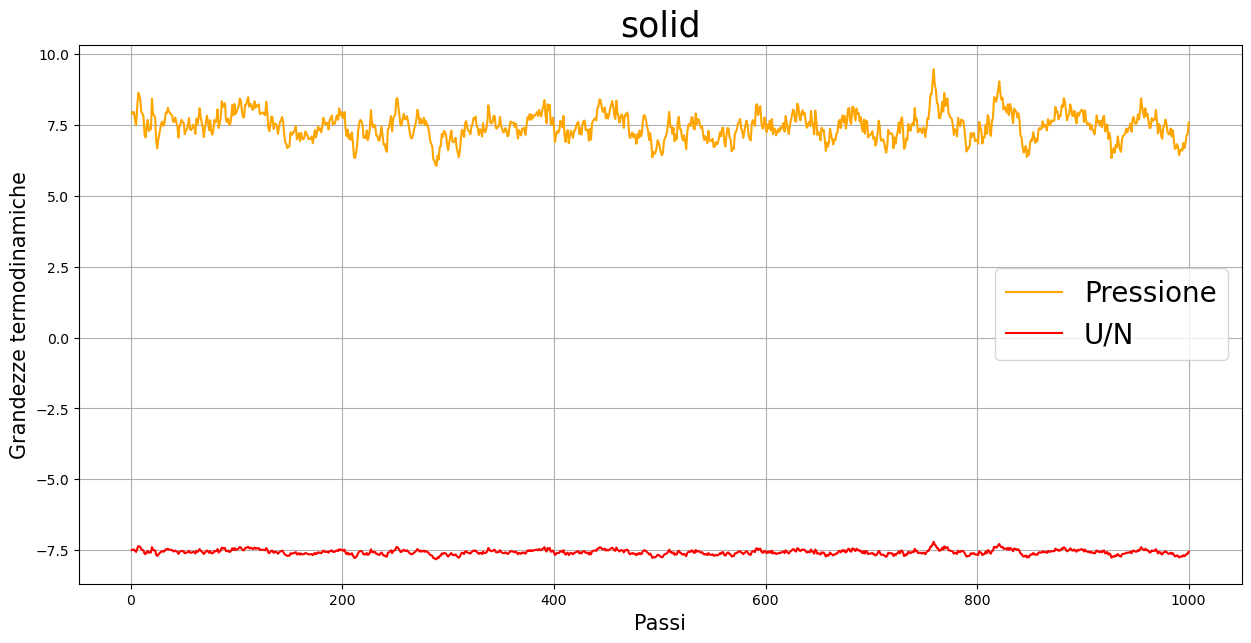

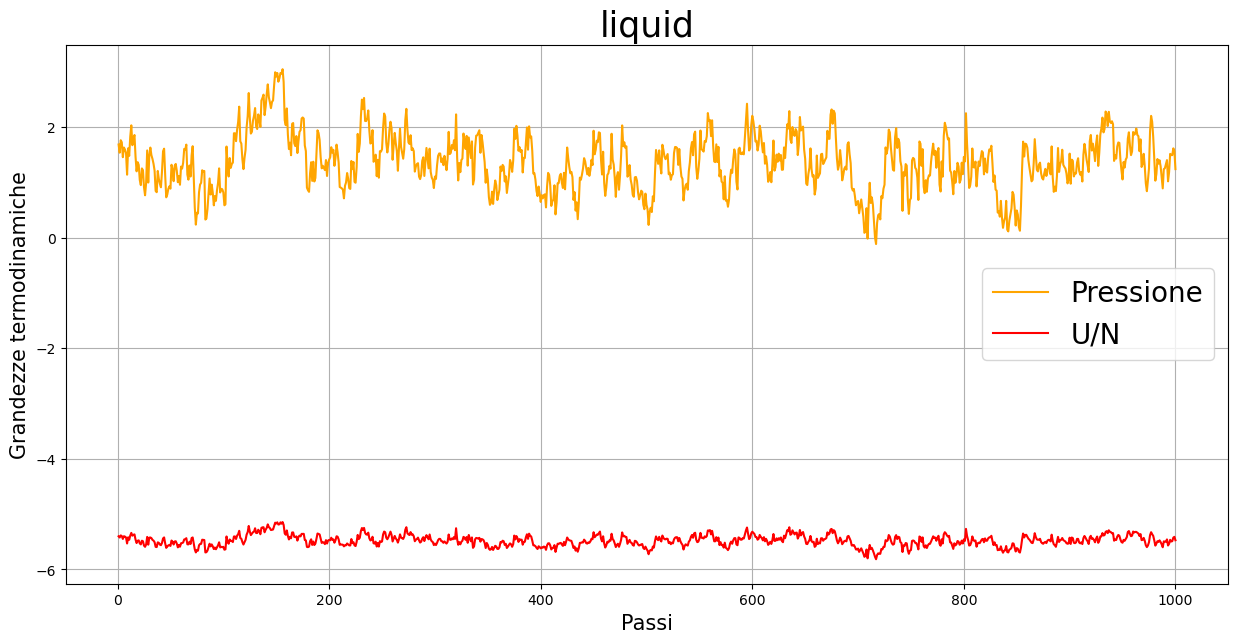

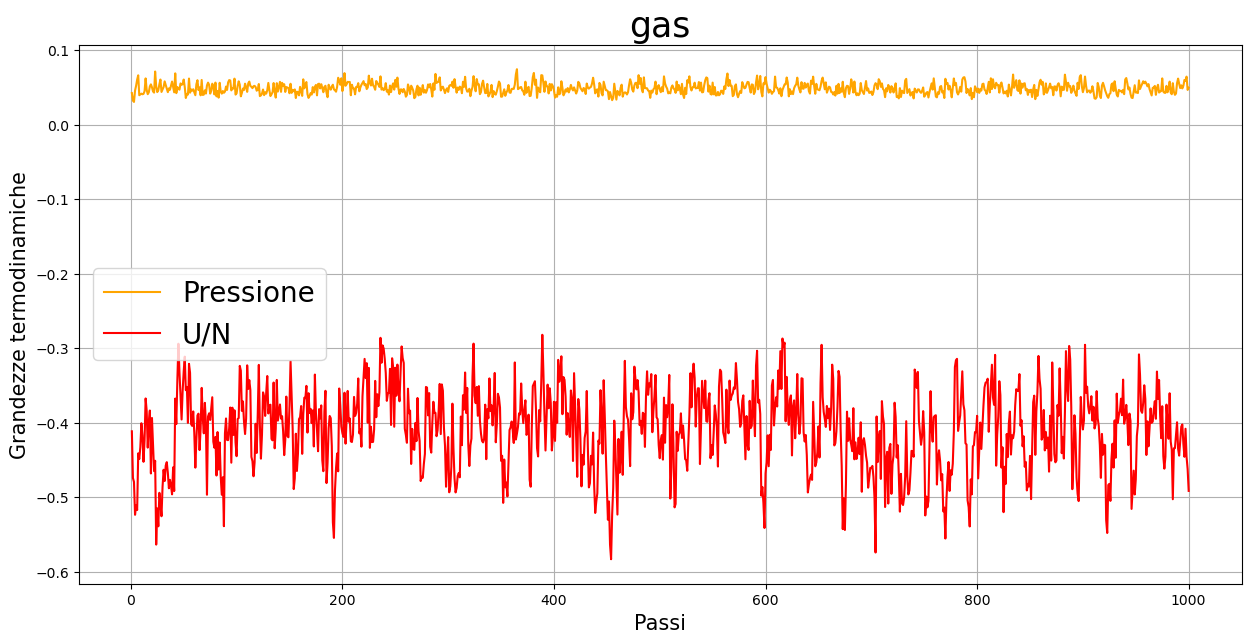

In [10]:
plotData('correlazione/',1000)

#### Osserviamo, che l'energia potenziale del gas anche all'equilibrio fluttua notevolmente ed è notevolmente correlata (su scala di circa 10000 passi Monte Carlo).
#### Altra osservabile in cui si osservano notevoli correlazioni, anche se non di tale entità (cioè su scala molto più piccola, circa 1000 passi Monte Carlo), è la pressione del liquido.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def treExp(x, a, b, c,d,e,f,g,h,i):
    return a * np.exp(-b * x) + c + d * np.exp(-e * x) + f \
                + g * np.exp(-h * x) + i
def dueExp(x,a,b,c,d,e,f):
    return a * np.exp(-b * x) + c + d * np.exp(-e * x)+f

def plotECorrelazione (fase,osservabile,T):

    ene = (np.loadtxt(fname = "correlazione/"+ fase+"/output."+osservabile+".0", usecols=(1)))#[30000:40000]

    def autocorrelazione(x,T):
        tmp = (np.array([np.average(x[:-t]*x[t:]) for t in np.arange(1,T)]) -np.average(x)**2)/np.std(x)**2
        return np.append(1,tmp)

    xData = (np.arange(T))
    yData = (autocorrelazione(ene,T)) #vettore lungo T

    plt.plot (xData,yData,marker='.',markersize=4,linewidth=0)

    if (fase == "Liquido" and osservabile == "epot"):
        popt, pcov = curve_fit(treExp, xData, yData)
        tau = 1/min(popt[1],popt[4],popt[7])
        plt.plot(xData, treExp(xData, *popt), 'r-',    \
                 label = 'tau=%5.3f' % tau, linewidth=.5)
    else:
        popt, pcov = curve_fit(dueExp, xData, yData)
        tau = 1/min(popt[1],popt[4])
        plt.plot(xData, dueExp(xData, *popt), 'r-',    \
                 label = 'tau=%5.3f' % tau, linewidth=.5 )


    plt.xlabel('T = tempo di correlazione')
    plt.ylabel('Autocorrelazione '+osservabile+' '+fase+' (T)')
    plt.grid(True)

    plt.legend(loc="lower left")
    plt.ylim((0,1))
    plt.show()

### Correlazioni dell'energia potenziale

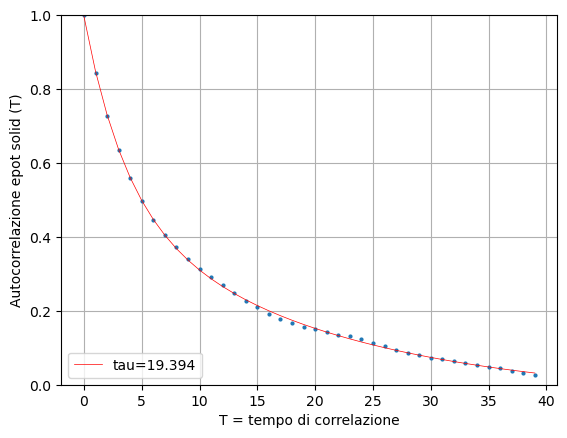

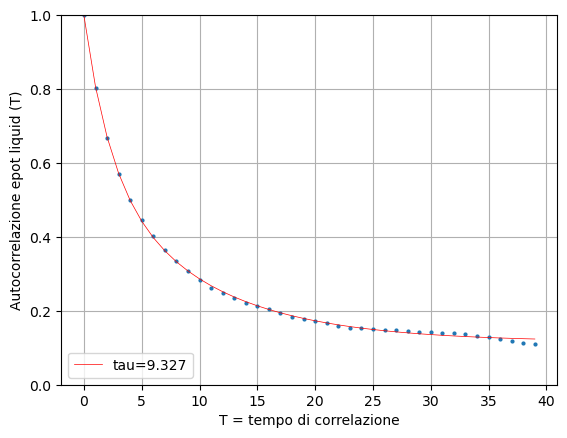

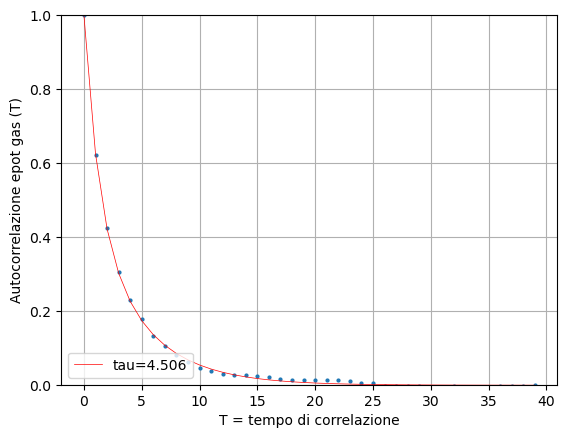

In [12]:
import warnings
T=40

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    plotECorrelazione("solid", "epot",T)
    plotECorrelazione("liquid", "epot",T)
    plotECorrelazione("gas","epot",T)


### Correlazioni della pressione

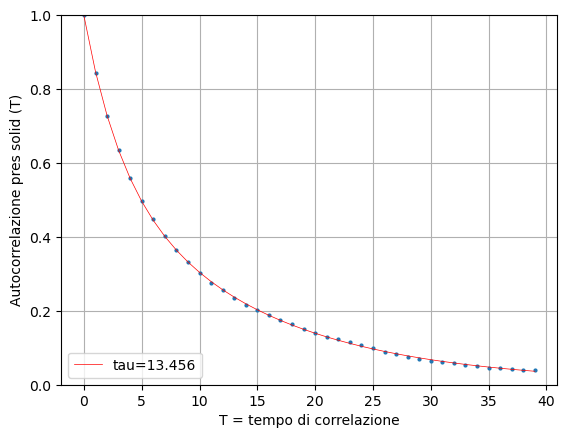

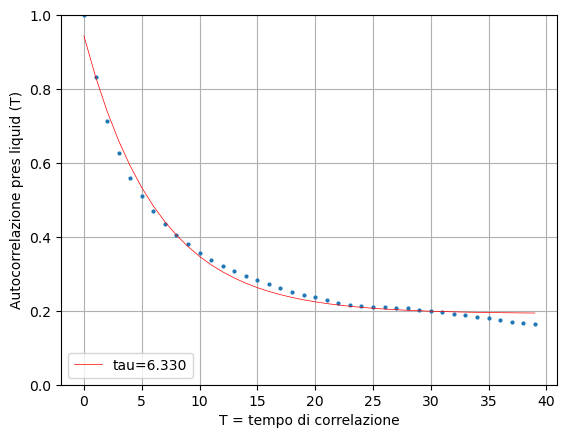

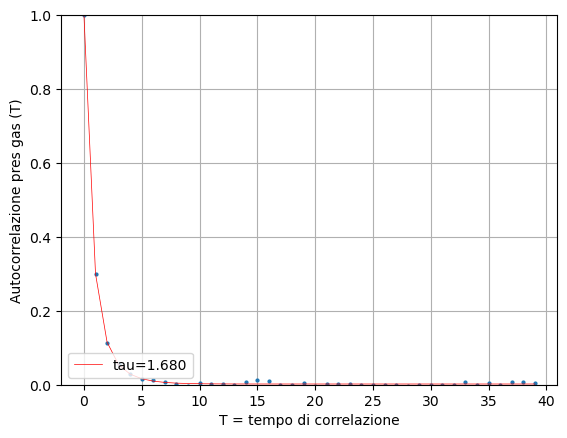

In [13]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    plotECorrelazione("solid", "pres",T)
    plotECorrelazione("liquid", "pres",T)
    plotECorrelazione("gas","pres",T)

Osserviamo, come già detto, che l'energia potenziale del gas anche all'equilibrio fluttua notevolmente ed è notevolmente correlata (su scala di circa 10000 passi Monte Carlo).
Altra osservabile in cui si osservano notevoli correlazioni, anche se non di tale entità (cioè su scala molto più piccola, circa 1000 passi Monte Carlo), è la pressione del liquido.

Dunque nel valutare queste due osservabili per queste fasi, dovremmo scegliere blocchi più grandi rispetto agli altri casi.

L'autocorrelazione dev'essere calcolata fino a tempi T significativamente minori del tempo Monte Carlo totale (la lunghezza del segnale), o si rischia di ottenere risultati non attendibili: <b>si hanno comportamenti che deviano dall'esponenziale quando T è confrontabile con la dimensione dei dati (il valore della correlazione per tempi simili al tempo totale non hanno molto senso poiché sono la media su pochi valori).</b>
Per avere l'autocorrelazione su uno spettro di T abbastanza ampi però non vogliamo neanche sceglierlo troppo piccolo, per non rischiare di avere poca statistica. 
Come compromesso abbiamo posto T = 100.

Dall'analisi di questi dati osserviamo che nella maggior parte dei casi con blocchi da 10 passi dovremmo essere coperti.

Per capire la proprietà **self-averaging** divido un sistema in sottosistemi. La dimensione dell'intero sistema è $L_0^d$ e quella di un sottosistema è $L^d_1$, dove $d$ è il numero di dimensioni spaziali. Supponiamo $L_0\gg L_1\gg 1$, cioè, l'intero sistema e il sottosistema sono entrambi molto grandi e inoltre il primo è molto più grande di quest'ultimo. Da $L_1\gg 1$, la dimensione del'interfaccia tra sottosistemi (la superficie di un sottosistema) $L_1^{d-1}$ è molto più piccola rispetto alla dimensione del sottosistema stesso $L^d_1$, dato che abbiamo $L_1^{d-1}/L_1^d=L_1^{-1}\ll 1$. Allora, la somma dell'energia libera di ciascun sottosistema indipendente $F_{\text{sub}}$ è molto vicina all'energia libera del sistema totale $F_{\text{tot}}$,

\begin{eqnarray}
F_{\text{tot}}&=& \sum_{j=1}^M(F_{\text{sub}}^j+O(L_1^{d-1}))\\
&=& \sum_{j=1}^M F_{\text{sub}}^j+O(L_0^d L_1^{-1})\\
\end{eqnarray}

Qui, $j$ è l'indice che indica il sottosistema e $M$ è il numero di sottosistemi $(L_0/L_1)^d(\gg 1)$. L'ultimo termine di $O(\cdot)$ corrisponde alla superficie di energia libera corrispondente all'interfaccia tra sottosistemi. Se dividiamo ambo i lati per il numero totale di spins $N=L_0^D$ per trovare l'energia libera per spin $f_{\text{tot}}=F_\text{tot}/N$, abbiamo
\begin{eqnarray}
f_\text{tot}&=&\frac{1}{M}\sum_{j=1}^M\frac{1}{L_1^d}F_\text{sub}^j+O(L_1^{-1})\\
&\simeq&\frac{1}{M}\sum_{j=1}^Mf_\text{sub}^j
\end{eqnarray}
il lato destro è la media dell'energia libera su molte $(M\gg 1)$ sistemi indipendenti, ciascuno con valori diversi dei campi casuali $\{h_i\}$ generati dalla stessa distribuzione $P(h_i)$. Il lato sinistro è, invece, l'energia libera di un singolo grande sistema con dati valori dei campi casuali $\{h_i\}$. L'equazione per $f_\text{tot}$ suggerisce che l'energia libera come funzione di un insieme fissato di campi casuali $\{h_i\}$ (lato sinistro) coincide con la stessa energia libera mediata sulla distribuzione (lato destro) nel limte di un sistema abbastanza grande. (un'affermazione più accurata è che ambo i lati dell'equazione coincidono con probabilità uno. La distribuzione di $f_\text{tot}$ si avvicina a una delta piccata al valor medio.) Il termine self-averaging riflette questa proprietà che il valore dell'energia libera coincide con la media di sé stessa.

La proprietà self-averaging ci permette di calcolare l'energia libera mediata sulla casualità invece che dell'energia libera per un dato insieme di campi casuali $\{h_i\}$, dove questi ultimi sono strettamente correlati a situazioni sperimentali. Siccome la prima media è più semplice da valutare rispetto a quest'ultima, in seguito discuteremo la prima. La media sulla casualità è detta media sulle configurazioni.

La proprietà self-averaging è condivisa da molte quantità estensive tra cui l'energia interna, il calore specifico, la magnetizzazione, e la suscettibilità magnetica se sono divise per la dimensione del sistema per dare il loro valore per spin. Il motivo è che queste quantità sono ottenute derivando l'energia libera rispetto ad appropriate variabili. (fonte: Nishimori-Ortiz)

Il teorema del limite centrale è valido anche per gradi di libertà non indipendenti, dato che faccio medie su blocchi con interazioni deboli tra blocchi. 

Ciò non è vero vicino alle transizioni di fase, dove ho code a potenza. Lì ho però universalità, cioè la termodinamica osservabile è indipendente da dinamica.

# Riduzione della varianza tramite media a blocchi

Una volta che questi dati sono stati prodotti, posso disegnare le funzioni di autocorrelazione di $U/N$ per stimare approssimativamente quanto grandi dovrebbero essere i blocchi nelle tue simulazioni.
Tramite gli stessi dati posso studiare la stima delle incertezze statistiche del valore atteso di $U/N$ per diverse dimensioni dei blocchi nella tecnica del data blocking, da $L=M/N=10$ a $L=5\times 10^3$, essendo $N$ il numero di blocchi. Faccio dei grafici di queste incertezze come funzione di $L$. Dopo che la dimensione del blocco è abbastanza grande (dal punto di vista della tecnica del data blocking), osservo una significativa riduzione delle incertezze statistiche.

In [29]:
import numpy as np
from matplotlib.pyplot import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
import math

ene = (np.loadtxt(fname = "correlazione/gas/output.epot.0", usecols=(1)))#[30000:40000]

dati = []
errori=[]

for L_blocco in range (1,50000):
    segnaleRidotto = [np.average(ene[L_blocco*i:L_blocco*(i+1)]) for i in range((int)(len(ene)/L_blocco))]
    dati.append(segnaleRidotto)
    errori.append(np.std(segnaleRidotto))



def f(L):
    L = int(math.sqrt(L))
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))
    axs[0].set_ylim((-0.56,-0.2))
    axs[1].set_ylim((0,0.08))
    axs[1].set_xlim((0,150))
    #axs[0].set_xlim((0,50000))
    axs[0].plot(np.arange(len(dati[L]))*L,dati[L],marker='.', markersize=0.5,linewidth=0)
    axs[1].plot(np.arange(1,150),1./np.sqrt(np.arange(1,150))/8.7 ,marker='.',markersize=0.5,linewidth=0)
    axs[1].plot(L,errori[L],marker='.', markersize=10)

#f(800)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning) 
    interact(f, L=widgets.IntSlider(min=1, max=10000, step=10, value=10),continuous_update=False);
show()

interactive(children=(IntSlider(value=10, description='L', max=10000, min=1, step=10), Output()), _dom_classes…

In [30]:
import numpy as np
import matplotlib.pyplot as plt
Emin = 0
Emax = 50000
ene = (np.loadtxt(fname = "correlazione/gas/output.epot.0", usecols=(1)))

errori = np.zeros(1)
errori2 = np.zeros(1)
# se fisso L e faccio aumentare N, la deviazione standard non cambia
for L in range(10,50000,10):
    N = (int)((Emax -Emin)/L)
    segnaleRidotto =np.array([np.average(ene[Emin +L*i:Emin +L*(i+1)]) for i in range(N)])
    errori = np.append(errori, np.std(segnaleRidotto)) 
    errori2 = np.append(errori2, np.std(segnaleRidotto) )    


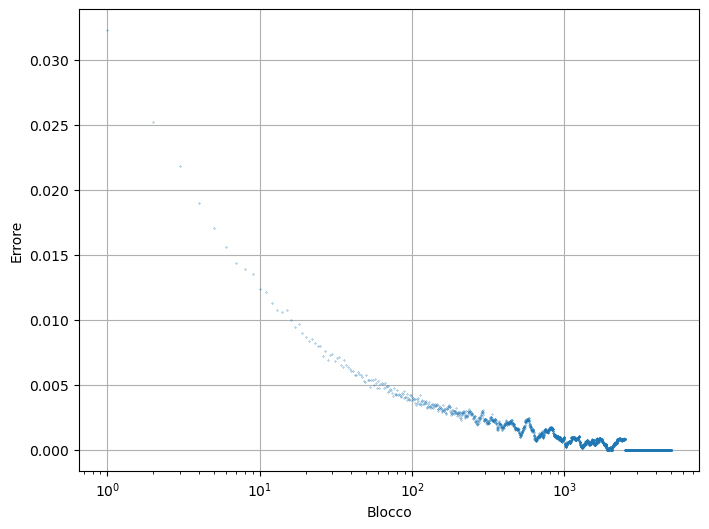

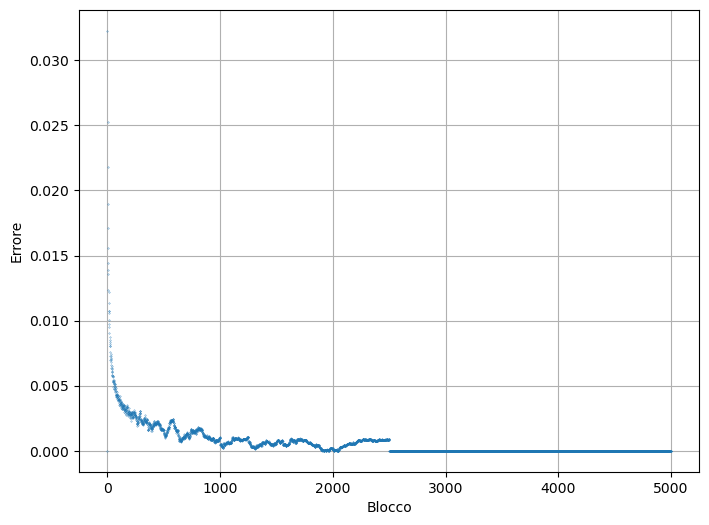

In [36]:
import matplotlib.pyplot as plt

# Plot con scala logaritmica sull'asse x
plt.figure(figsize=(8, 6))
plt.plot(errori, '.', markersize=0.5)
plt.xscale('log')
plt.xlabel('Blocco')
plt.ylabel('Errore')
plt.grid(True)
plt.show()

# Plot con scala lineare sull'asse x
plt.figure(figsize=(8, 6))
plt.plot(errori, '.', markersize=0.5)
plt.xlabel('Blocco')
plt.ylabel('Errore')
plt.grid(True)
plt.show()


# Calcolo della correlazione a coppie

Ho incluso il calcolo della funzione di distribuzione radiale, $ g(r)$, come funzione della distanza radiale $ r $ tra le particelle, con $ r $ tra [0; L/2]  all'interno del codice Monte Carlo NVT fornito: ho calcolato il valore medio di$ g(r)$ in ciascun blocco (con output nel file: output.gofr.0), e il valore medio finale di $ g(r)$ con le relative incertezze statistiche (con output nel file: output.gave.0).

In [19]:

print('do you want to execute this program:')
answer = input('->  [yes| No]: ' )
if answer == 'yes' :
    for i in range (0,3) :
        setInitialConfig(phase[i],'equilibrazione/'+phase[i]+'/config.final',passo[i],50,200,'distRadiale/')
        runSimulation(phase[i],'distRadiale/')



do you want to execute this program:


->  [yes| No]:  no


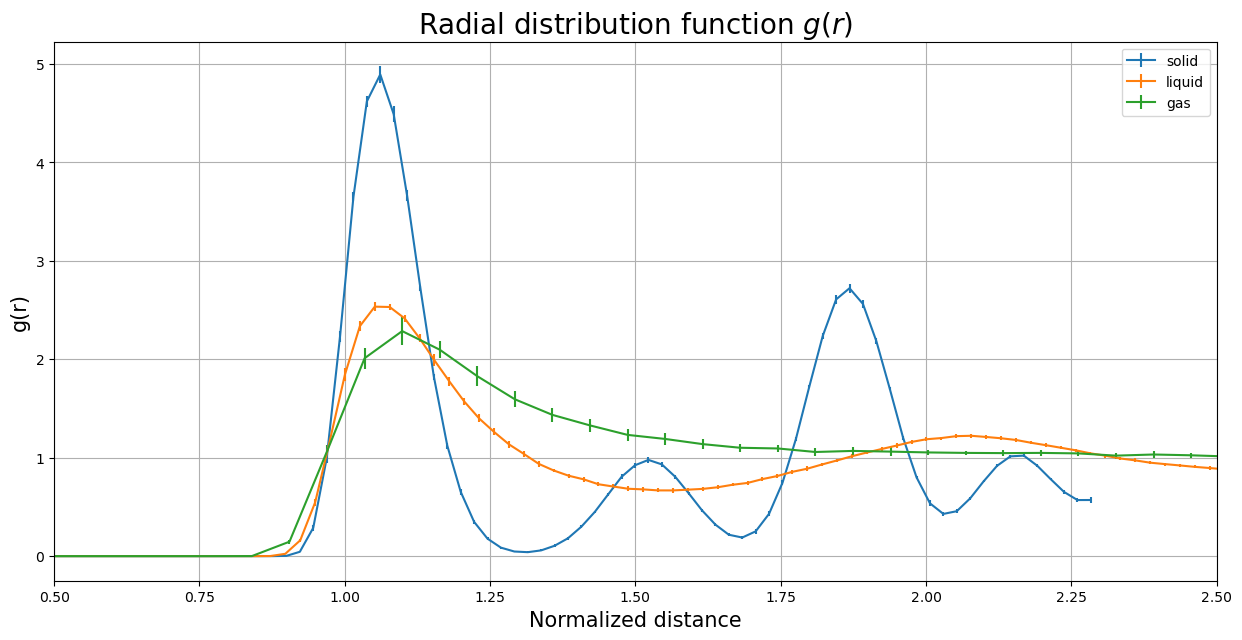

In [20]:
plt.figure(figsize=(15, 7))
x=np.arange(0,100)

# box scaling
rho = [1.1, 0.8, 0.05]
npart = 108
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = ((rho[i]/npart)**(-1/3))/200
    
for i in range (3):
        gdr = np.loadtxt("distRadiale/"+phase[i]+"/output.gave.0", usecols=range(0,100), unpack='true', max_rows=20)
        y = np.mean(gdr, axis=1)
        err = np.std(gdr, axis=1)
        plt.errorbar(x*L[i], y, err, marker='',label=phase[i] )
        plt.title("Radial distribution function $g(r)$", fontsize=20)
        plt.xlabel('Normalized distance', fontsize=15)
        plt.ylabel('g(r)', fontsize=15)
        plt.legend()
        plt.grid(True)
        plt.xlim(0.5,2.5)

Attraverso il codice MC aggiornato, ho equilibrato ed eseguito simulazioni MC NVT tramite un modello di Lennard-Jones per l'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) e il Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) nelle seguenti condizioni:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cutoff: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cutoff: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cutoff: $r_c = 5.0$)


In [21]:

print('do you want to execute this program:')
answer = input('->  [yes| No]: ' )
if answer == 'yes' :
    for i in range (0,3) :
        setInitialConfig(phase[i],'equilibrazione/'+phase[i]+'/config.final',passo[i],50,2000,'argon/')
        runSimulation(phase[i],'argon/')


do you want to execute this program:


->  [yes| No]:  no


Mostro con opportuni grafici i valori medi ottenuti e le relative incertezze per l'energia potenziale per particella, $U/N$, la pressione $P$ e la funzione di distribuzione radiale $g(r)$ in unità SI, e confronto i risultati MC per la funzione di distribuzione radiale, $g(r)$, con quelli ottenuti tramite simulazioni di Dinamica Molecolare NVE in condizioni termodinamiche simili.

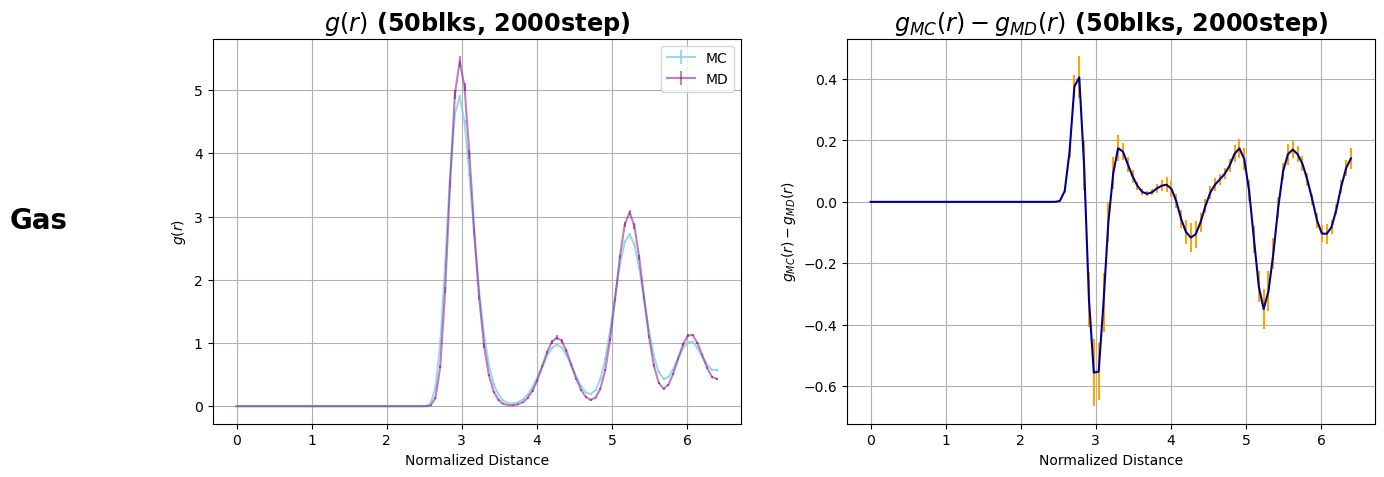

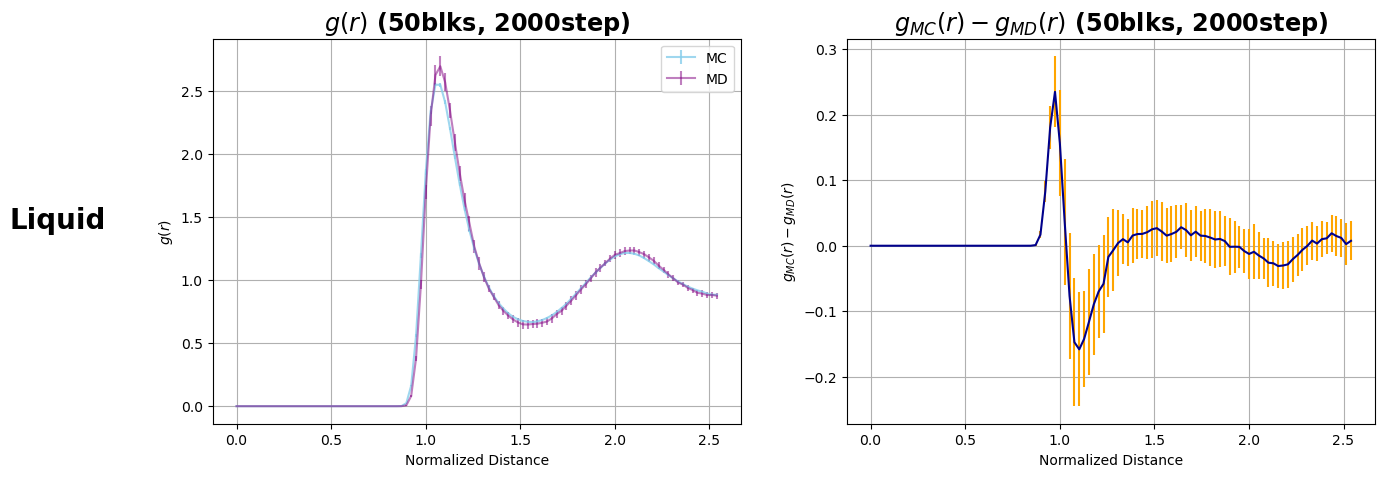

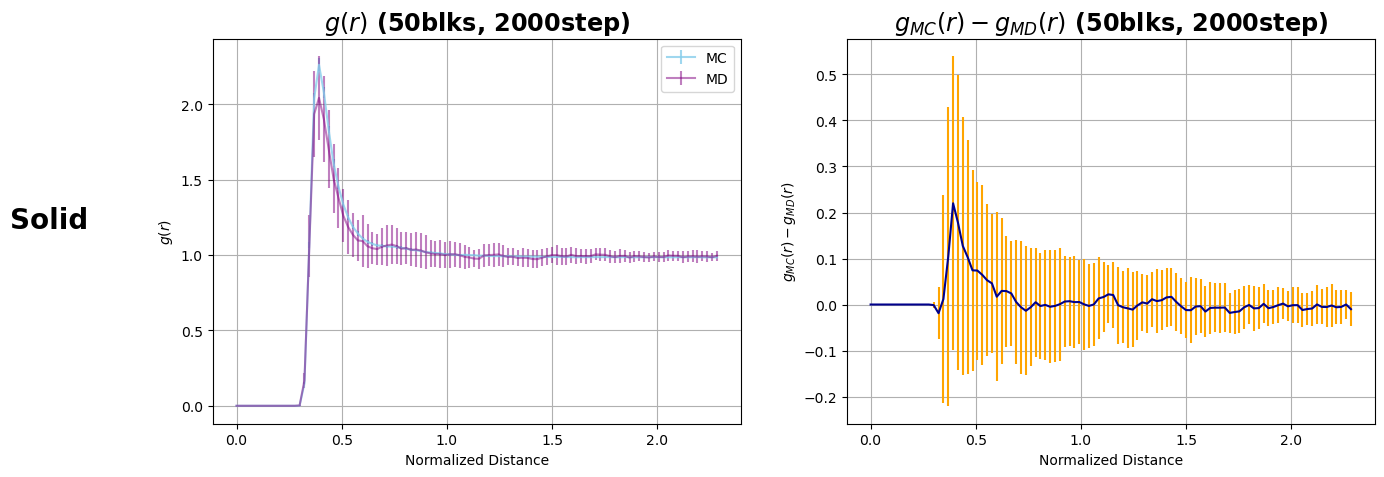

In [39]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

rho = [0.05, 0.8, 1.1]
npart = 108
L = [0.0,0.0,0.0]
Ph=["Gas","Liquid","Solid"]

for i in range(3):
        L[i] = ((rho[i]/npart)**(-1/3))/200
    
x=np.arange(0,100)
    
for i in range (3):
        fig=plt.figure(figsize=(15, 5))
        
        plt.subplot(1,2,1)
        gdr = np.loadtxt("argon/"+phase[i]+"/output.gave.0", usecols=range(0,100), unpack='true', max_rows=50)
        gdr2 = np.loadtxt("../4-moleculardynamicsnve/argon/"+phase[i]+"/gofr.dat", usecols=range(0,100), unpack='true', max_rows=50)
        y = np.mean(gdr, axis=1)
        y2 = np.mean(gdr2, axis=1)
        err = np.std(gdr, axis=1)
        err2 = np.std(gdr2, axis=1)
        plt.errorbar(x*L[i], y, err, marker='', color='skyblue',alpha=0.8, label='MC')
        plt.errorbar(x*L[i], y2, err2, marker='', color='purple',alpha=0.5,label='MD')
        plt.title('$g(r)$ (50blks, 2000step)', size='xx-large', weight='bold')
        plt.ylabel('$g(r)$')
        plt.xlabel('Normalized Distance')        
        plt.legend()
        plt.grid(True)
        
        plt.subplot(1,2,2)
        plt.errorbar(x*L[i], y-y2, err+err2, marker='', color='darkblue', ecolor='orange')
        plt.title('$g_{MC}(r)-g_{MD}(r)$ (50blks, 2000step)', size='xx-large', weight='bold')
        plt.ylabel('$g_{MC}(r)-g_{MD}(r)$')
        plt.xlabel('Normalized Distance')
        plt.grid(True)
        
        fig.text(-0.01, 0.5, Ph[i],  weight="bold", size=20)
        
        plt.show()

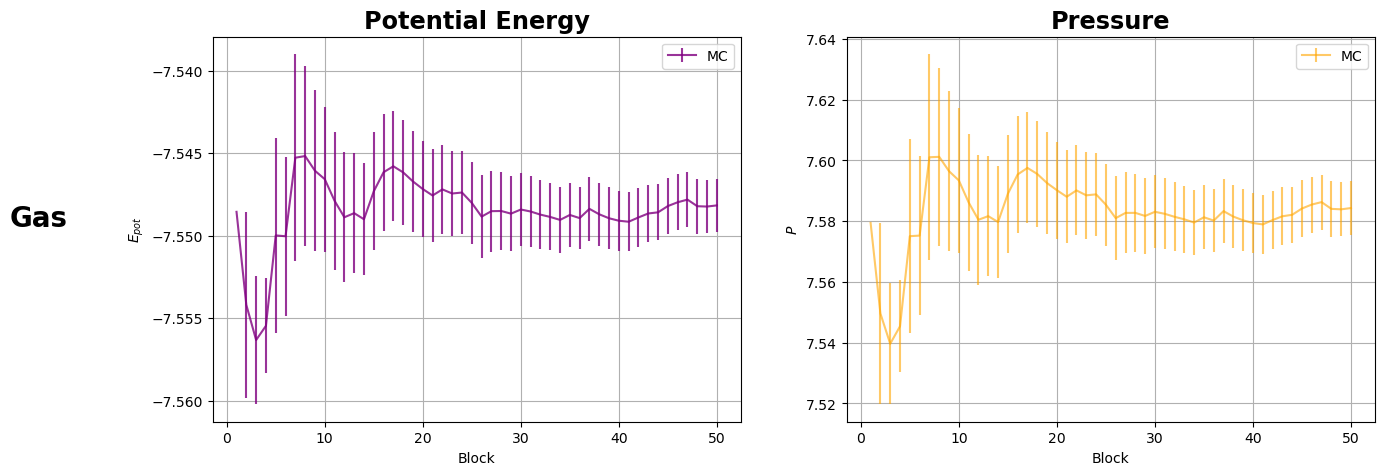

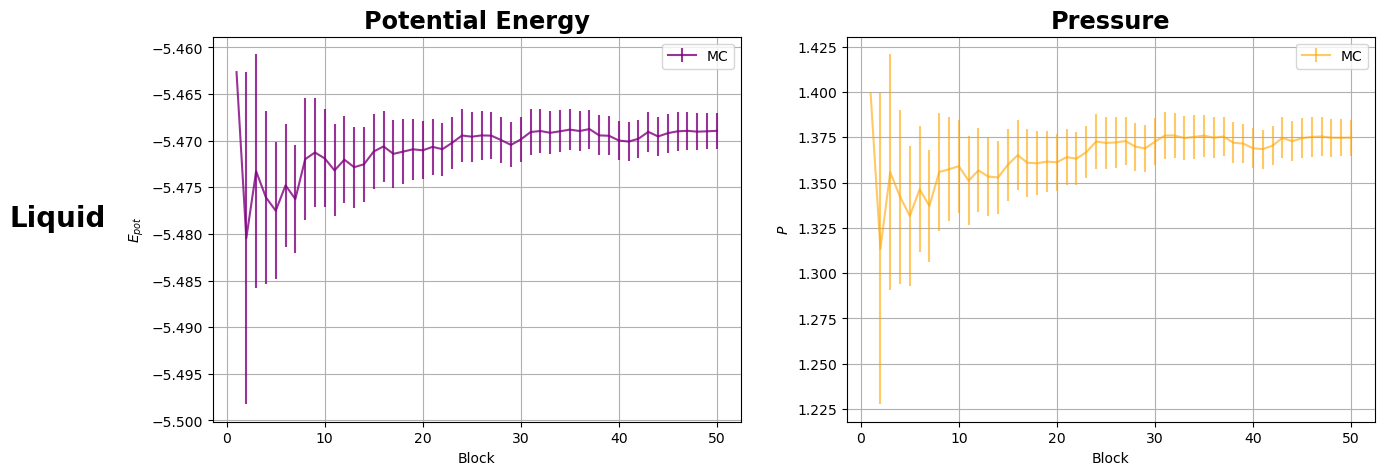

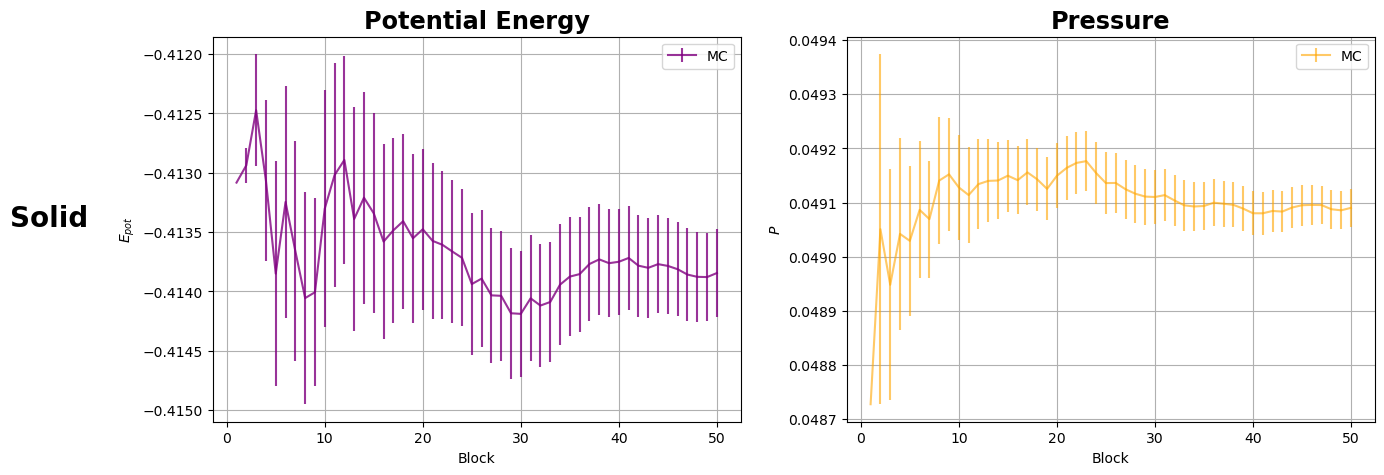

In [40]:
for i in range (3):
        fig=plt.figure(figsize=(15, 5))
        
        plt.subplot(1,2,1)
        y, err = np.loadtxt("argon/"+phase[i]+"/output.epot.0", usecols=(2,3), unpack='true')
        x=np.arange(1,51)
        plt.errorbar(x, y, err, marker='', color='purple',alpha=0.8, label='MC')
        plt.title('Potential Energy', size='xx-large', weight='bold')
        plt.ylabel('$E_{pot}$')
        plt.xlabel('Block')        
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        y1, err1 = np.loadtxt("argon/"+phase[i]+"/output.pres.0", usecols=(2,3), unpack='true')
        plt.errorbar(x, y1, err1, marker='', color='orange',alpha=0.6, label='MC')
        plt.title('Pressure', size='xx-large', weight='bold')
        plt.ylabel('$P$')
        plt.xlabel('Block')        
        plt.legend()
        plt.grid(True)

        fig.text(-0.01, 0.5, Ph[i],  weight="bold", size=20)
        
        plt.show()